In [1]:
%matplotlib inline 
# Start Python Imports
import pandas as pd
import numpy as np
from sklearn import metrics
import math


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
#from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
customers = pd.read_csv("bank-full.csv")
customers.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#customer.info returs data type of each colunm and checks for null values 
#no null value found 
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [4]:
#customer.dtypes shows data type of each colunm 
print(customers.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [5]:
#data.describe provides statistical summary of each numerical  colunm
customers.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#customer.shape provides shape of dataframe
customers.shape

(45211, 17)

In [7]:
#check for missing values , no null value in data 
customers.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [8]:
#get number of unique values in each column
customers.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

# Univarate Analysis

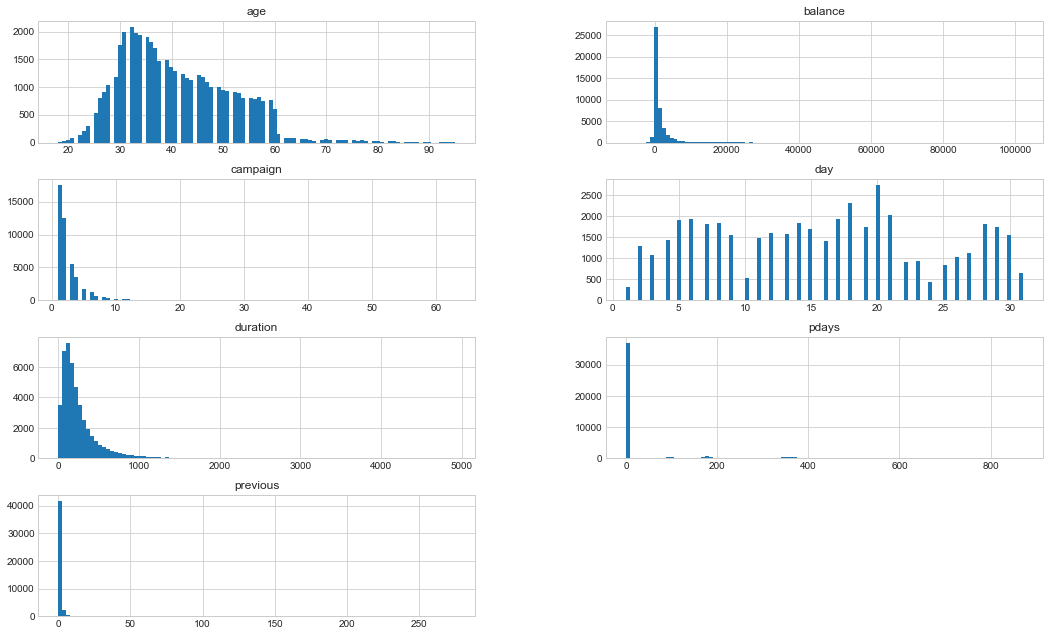

In [9]:
#Plot histogarm columns
columns = ['age','balance','duration','campaign','pdays','previous','day']
customers[columns].hist(stacked=False, bins=100, figsize=(18,40), layout=(14,2)); 

customers age is distributed between 18 abd 95 years but with outliers afer  60yrs

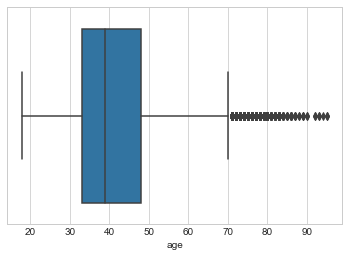

In [10]:
sns.boxplot(x=customers['age'])

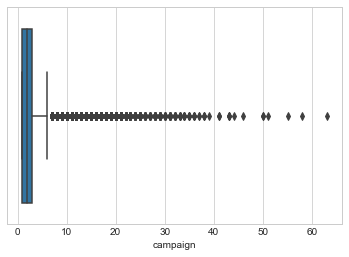

In [11]:
sns.boxplot(x=customers['campaign'])

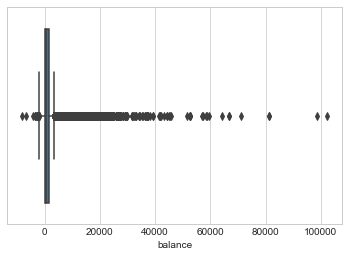

In [12]:
sns.boxplot(x=customers['balance'])

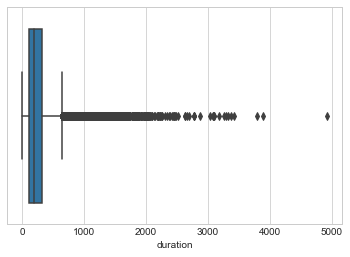

In [13]:
sns.boxplot(x=customers['duration'])

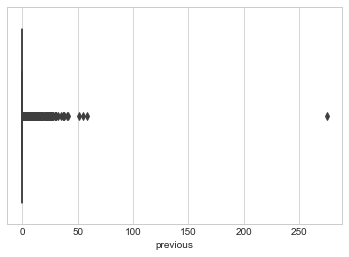

In [14]:
sns.boxplot(x=customers['previous'])

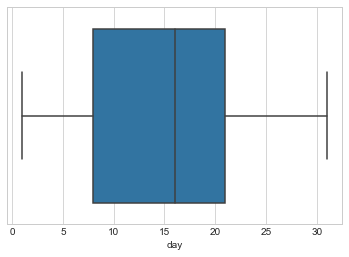

In [15]:
sns.boxplot(x=customers['day'])

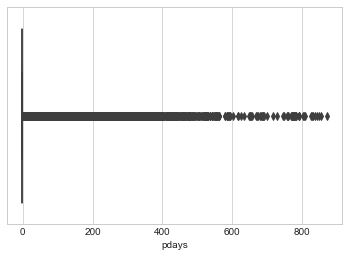

In [16]:
sns.boxplot(x=customers['pdays'])

# Univarate analysis of categorical data

Target Feature: Target
Description: indicated Whether the customer accepted the term loan offer or not 
this is the variable we want our machine learning model to predict.
88 percent of customees did not accept the term loan, this colunm is imnbalanced

no     88.30152
yes    11.69848
Name: Target, dtype: float64


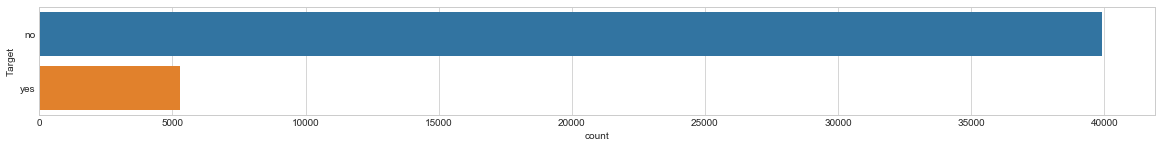

In [17]:
# number of customers that accepted the loan, Target colunm?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Target', data=customers);
print(customers.Target.value_counts(normalize='true')* 100)

only 11.7% of customers accepted the term loan , making the colunm Imbalanced 

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64


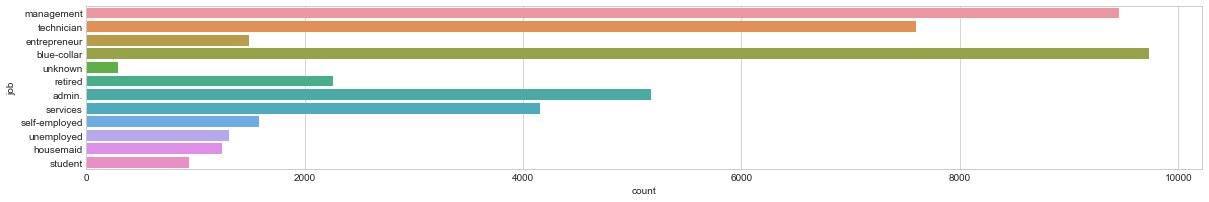

In [18]:
#Jobs
#  distribution of customer job types
fig = plt.figure(figsize=(20,3))
sns.countplot(y='job', data=customers);
print(customers.job.value_counts(normalize='true')* 100)

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64


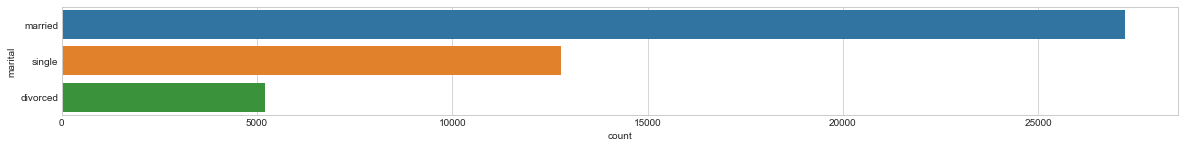

In [19]:
#  distribution of customer marital status?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='marital', data=customers);
print(customers.marital.value_counts(normalize='true')* 100)

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64


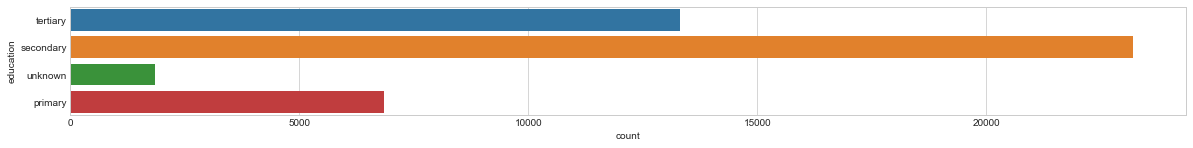

In [20]:
# distribution of educational status?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='education', data=customers);
print(customers.education.value_counts(normalize='true')* 100)

no     98.197341
yes     1.802659
Name: default, dtype: float64


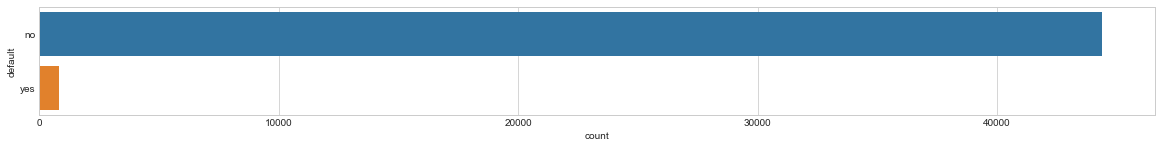

In [21]:
# distrution of customers that  has credit in default?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='default', data=customers);
print(customers.default.value_counts(normalize='true')* 100)

yes    55.583818
no     44.416182
Name: housing, dtype: float64


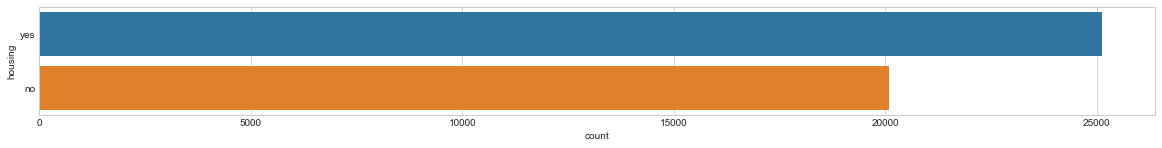

In [22]:
# distribion of customers with housing  loan?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='housing', data=customers);
print(customers.housing.value_counts(normalize='true')* 100)

no     83.977351
yes    16.022649
Name: loan, dtype: float64


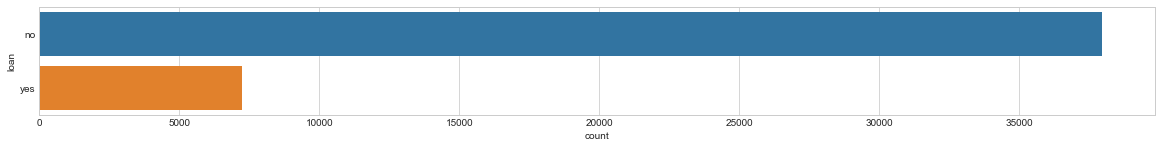

In [23]:
# distrubion of customers that has existing personal loan?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='loan', data=customers);
print(customers.loan.value_counts(normalize='true')* 100)

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64


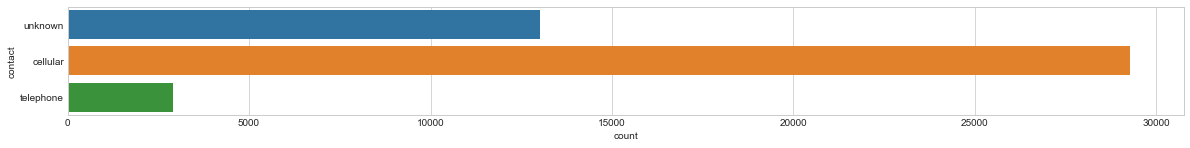

In [24]:
# distribution by means of contacting customer ?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='contact', data=customers);
print(customers.contact.value_counts(normalize='true')* 100)

may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: month, dtype: float64


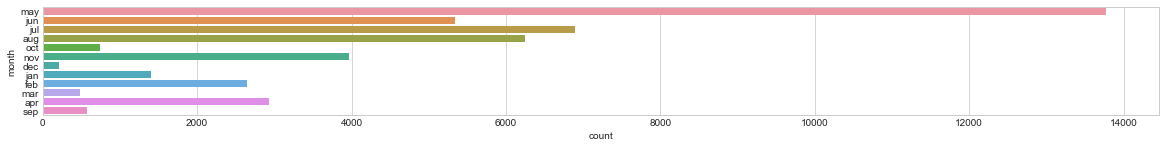

In [25]:
# How distibution of last contact month of the year ?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='month', data=customers);
print(customers.month.value_counts(normalize='true')* 100)

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64


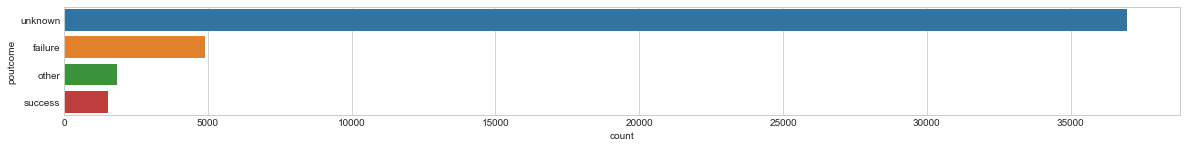

In [26]:
# what is the distribution of the outcome of previous campaigns ?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='poutcome', data=customers);
print(customers.poutcome.value_counts(normalize='true')* 100)

# BiVariate Plots

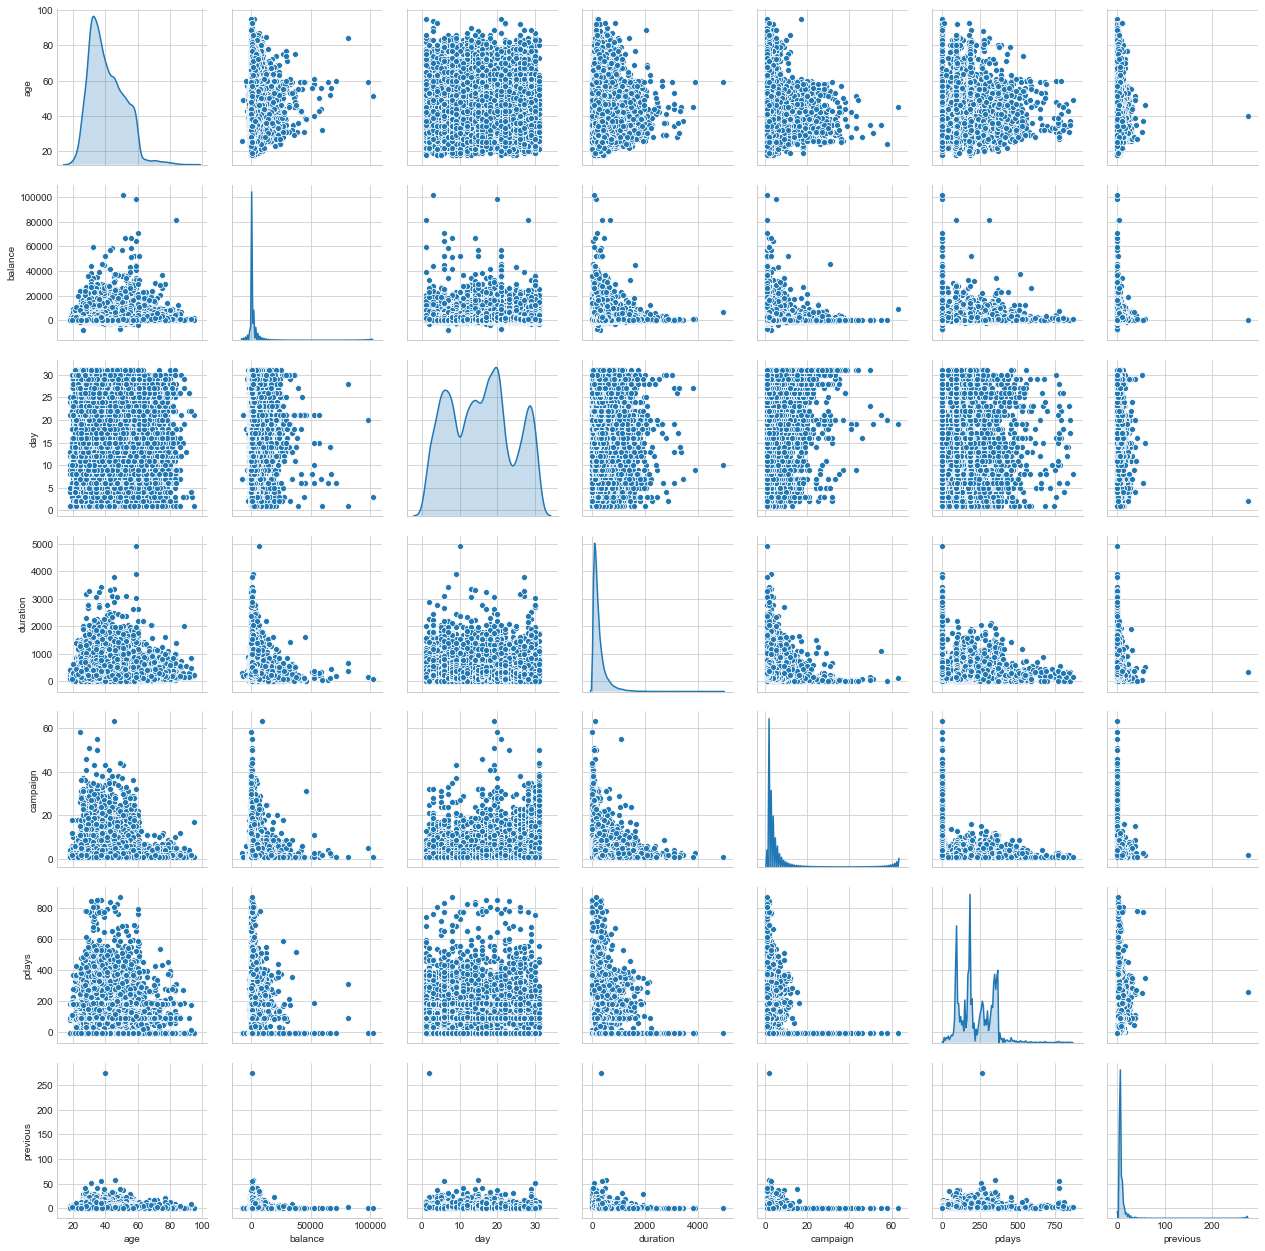

In [27]:
#pair plot
sns.pairplot(customers,diag_kind='kde')


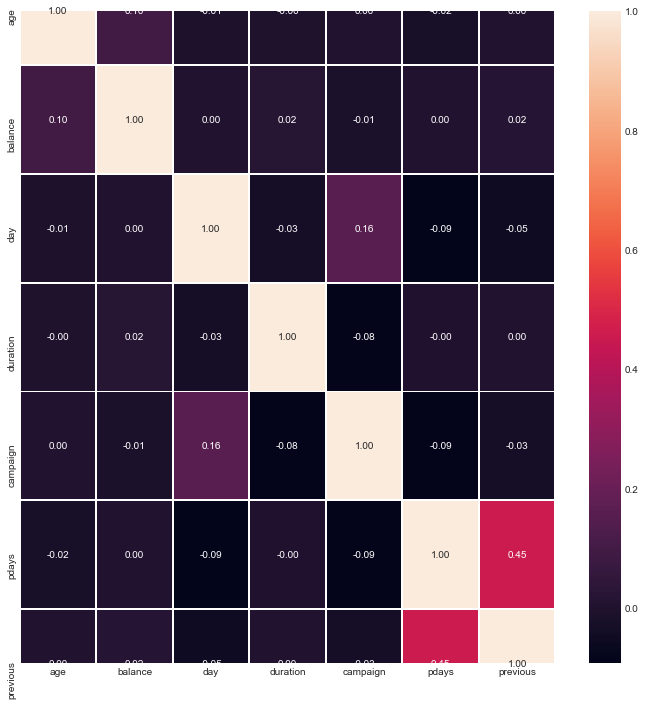

In [28]:
fig,ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(customers.corr(), ax=ax, annot=True, linewidths=1, fmt= '.2f')
plt.show()

from pairplot and correlation heatmap , the colums are Independent


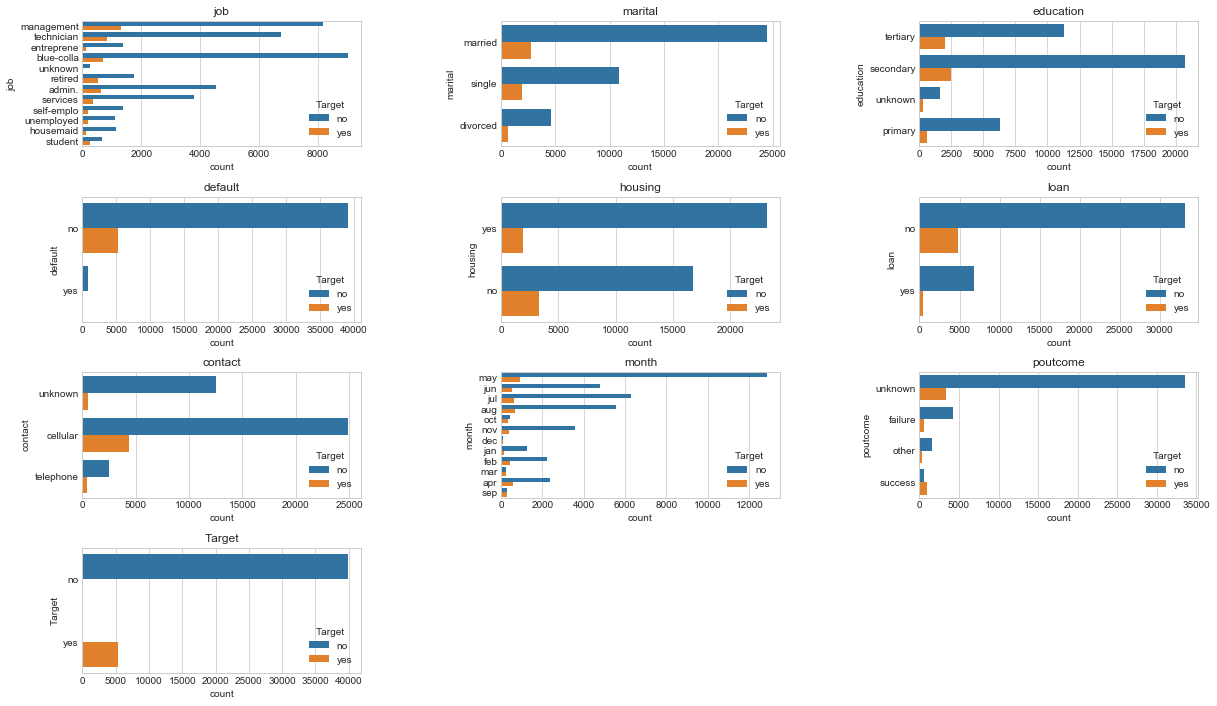

In [30]:
# Plot a count of the categories from each categorical feature split by our prediction class: Target - predclass.
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=25, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(customers, hue='Target', cols=3, width=20, height=12, hspace=0.4, wspace=0.5)

In [31]:
# Display distribution of various numerical columns for each yes and no value of the target Variable

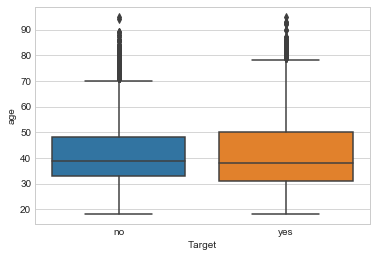

In [32]:
sns.boxplot( x=customers["Target"], y=customers["age"] )
#sns.plt.show()


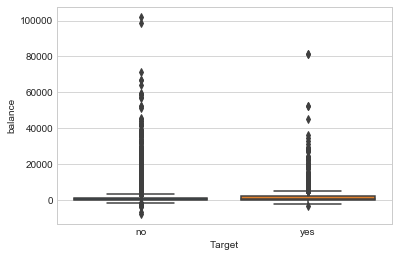

In [33]:
sns.boxplot( x=customers["Target"], y=customers["balance"] )
#sns.plt.show()


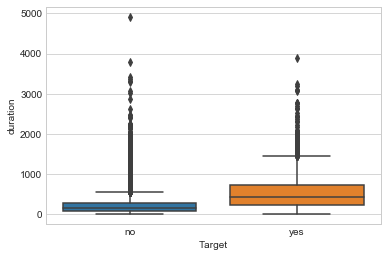

In [34]:
sns.boxplot( x=customers["Target"], y=customers["duration"] )

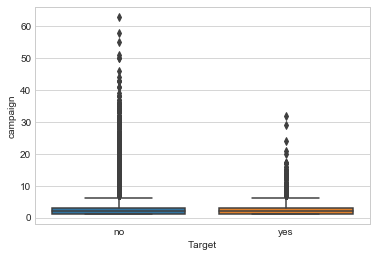

In [35]:
sns.boxplot( x=customers["Target"], y=customers["campaign"] )

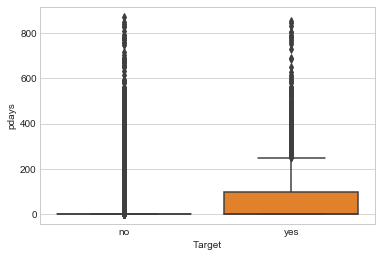

In [36]:
sns.boxplot( x=customers["Target"], y=customers["pdays"] )

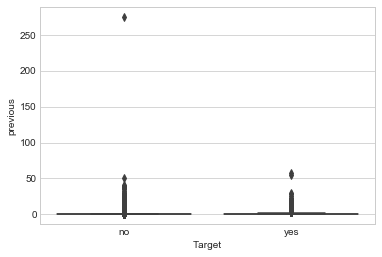

In [37]:
sns.boxplot( x=customers["Target"], y=customers["previous"] )

In [38]:
#replace categorical variables with numerical values 

replaceStruct = {
                "Target":     {"yes": 1, "no": 0},
                "job": {"blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, "retired": 6,"self-employed":7,"entrepreneur": 8,"unemployed": 9, "housemaid" : 10, "student": 11, "unknown" : -1 },
                "marital": {"married" : 1, "single": 2, "divorced": 3},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3,"unknown": -1},
                "poutcome":     {"success": 1, "failure": 2 ,"other": 3 ,"unknown": -1 },
                "month": {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6,"jul":7,"aug": 8,"sep": 9, "oct" : 10, "nov": 11, "dec" : 12 },
                "contact":     {"cellular": 1, "telephone": 2, "unknown": -1 },
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "default":     {"no": 0, "yes": 1 }
                
                    }

cusData=customers.replace(replaceStruct)
cusData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1,0


# Unknown Values 
To account for uknown values in the data, contact,education,jobs,pdays,poutcome colunm will be treated based on number of unknown values in each colunm 

In [39]:
#job colunm
cusData.job.value_counts(normalize = 'true')
#0.6 percent of the jobs are unknown and will be replaced by the mode 1
cusData.job[cusData['job'] == -1] = 1
cusData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,1,2,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1,0
5,35,2,1,3,0,231,1,0,-1,5,5,139,1,-1,0,-1,0
6,28,2,2,3,0,447,1,1,-1,5,5,217,1,-1,0,-1,0
7,42,8,3,3,1,2,1,0,-1,5,5,380,1,-1,0,-1,0
8,58,6,1,1,0,121,1,0,-1,5,5,50,1,-1,0,-1,0
9,43,3,2,2,0,593,1,0,-1,5,5,55,1,-1,0,-1,0


In [40]:
#Education 
cusData.education.value_counts(normalize = 'true')
#4 percent of the jobs are unknown and will be replaced by the mode 2
cusData.education[cusData['education'] == -1] = 2
cusData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,2,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,1,2,2,0,1,0,0,-1,5,5,198,1,-1,0,-1,0
5,35,2,1,3,0,231,1,0,-1,5,5,139,1,-1,0,-1,0
6,28,2,2,3,0,447,1,1,-1,5,5,217,1,-1,0,-1,0
7,42,8,3,3,1,2,1,0,-1,5,5,380,1,-1,0,-1,0
8,58,6,1,1,0,121,1,0,-1,5,5,50,1,-1,0,-1,0
9,43,3,2,2,0,593,1,0,-1,5,5,55,1,-1,0,-1,0


In [41]:
#Contact colunm
cusData.contact.value_counts(normalize = 'true')
#28 percent of the contact value are unknown and will be replaced by the mode 1
cusData.contact[cusData['contact'] == -1] = 1
cusData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,1,0,1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,1,1,1,5,5,76,1,-1,0,-1,0
3,47,1,1,2,0,1506,1,0,1,5,5,92,1,-1,0,-1,0
4,33,1,2,2,0,1,0,0,1,5,5,198,1,-1,0,-1,0
5,35,2,1,3,0,231,1,0,1,5,5,139,1,-1,0,-1,0
6,28,2,2,3,0,447,1,1,1,5,5,217,1,-1,0,-1,0
7,42,8,3,3,1,2,1,0,1,5,5,380,1,-1,0,-1,0
8,58,6,1,1,0,121,1,0,1,5,5,50,1,-1,0,-1,0
9,43,3,2,2,0,593,1,0,1,5,5,55,1,-1,0,-1,0


In [42]:
cusData.pdays.value_counts(normalize = 'true')
#81 percent of the customers were not contacted by previous campaign so we will drop this column
cusData = cusData.drop("pdays" , axis = 1)
cusData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,1,5,5,261,1,0,-1,0
1,44,3,2,2,0,29,1,0,1,5,5,151,1,0,-1,0
2,33,8,1,2,0,2,1,1,1,5,5,76,1,0,-1,0
3,47,1,1,2,0,1506,1,0,1,5,5,92,1,0,-1,0
4,33,1,2,2,0,1,0,0,1,5,5,198,1,0,-1,0
5,35,2,1,3,0,231,1,0,1,5,5,139,1,0,-1,0
6,28,2,2,3,0,447,1,1,1,5,5,217,1,0,-1,0
7,42,8,3,3,1,2,1,0,1,5,5,380,1,0,-1,0
8,58,6,1,1,0,121,1,0,1,5,5,50,1,0,-1,0
9,43,3,2,2,0,593,1,0,1,5,5,55,1,0,-1,0


In [43]:
cusData.poutcome.value_counts(normalize = 'true')
#81 percent of the poutcome are unknown, so we will drop this colunm 
cusData = cusData.drop("poutcome" , axis = 1)
cusData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
0,58,2,1,3,0,2143,1,0,1,5,5,261,1,0,0
1,44,3,2,2,0,29,1,0,1,5,5,151,1,0,0
2,33,8,1,2,0,2,1,1,1,5,5,76,1,0,0
3,47,1,1,2,0,1506,1,0,1,5,5,92,1,0,0
4,33,1,2,2,0,1,0,0,1,5,5,198,1,0,0
5,35,2,1,3,0,231,1,0,1,5,5,139,1,0,0
6,28,2,2,3,0,447,1,1,1,5,5,217,1,0,0
7,42,8,3,3,1,2,1,0,1,5,5,380,1,0,0
8,58,6,1,1,0,121,1,0,1,5,5,50,1,0,0
9,43,3,2,2,0,593,1,0,1,5,5,55,1,0,0


# outliers 

Age has outliers that range between 60 and 95 which should be as expected because banks should be expected to have fewer older customers, so we will retain the outliers. for remaining numerical colunms replace outlier with median value
#select numeriacal value



In [44]:
#replace outliers with upper or lower percentile
#balance 
L = cusData['balance'].quantile(0.10) #10 percentile 
U = cusData['balance'].quantile(0.90) #90 percentile 

cusData["balance"] = np.where(cusData["balance"] <L, L,cusData['balance'])
cusData["balance"] = np.where(cusData["balance"] >U, U,cusData['balance'])
print(cusData['balance'].skew())

1.2328950627435447


In [45]:
#balance 
L = cusData['campaign'].quantile(0.10) #10 percentile 
U = cusData['campaign'].quantile(0.90) #90 percentile 

cusData["campaign"] = np.where(cusData["campaign"] <L, L,cusData['campaign'])
cusData["campaign"] = np.where(cusData["campaign"] >U, U,cusData['campaign'])
print(cusData['campaign'].skew())

0.8257971252079263


In [46]:
#balance 
L = cusData['duration'].quantile(0.10) #10 percentile 
U = cusData['duration'].quantile(0.90) #90 percentile 

cusData["duration"] = np.where(cusData["duration"] <L, L,cusData['duration'])
cusData["duration"] = np.where(cusData["duration"] >U, U,cusData['duration'])
print(cusData['duration'].skew())

0.8608241791718303


# Split Data

In [47]:
#split Data 
X = cusData.drop("Target" , axis=1)
y = cusData.pop("Target")

X.head()
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


# Logical, decision tree and ensemble models

In [49]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='d', xticklabels = [0,1] , yticklabels = [0,1],cmap='coolwarm', annot_kws={'size':16})
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Logical regression 

In [50]:
#from sklearn import metrics

#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

Trainig accuracy 0.8832432774038613

Testing accuracy 0.8835889118254202

Confusion Matrix


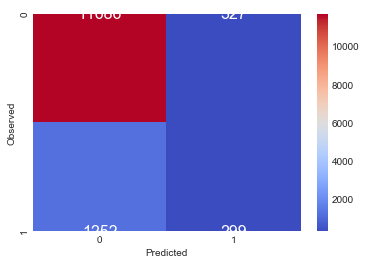

None

Recall: 0.19277885235332043

Precision: 0.4776357827476038

F1 Score: 0.2746899402847956

Roc Auc Score: 0.5827791706201798


In [51]:
print("Trainig accuracy",model.score(X_train,y_train)) 
print()
print("Testing accuracy",model.score(X_test, y_test))
LRscore = model.score(X_test,y_test)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
LRrecall = recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
LRpre = precision_score(y_test,y_predict) 
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
 

Decision tree

In [52]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
#dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)

Trainig accuracy 1.0

Testing accuracy 0.8636095547036272

Confusion Matrix


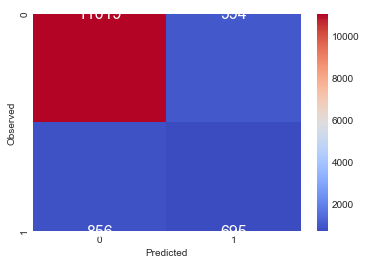

None

Recall: 0.4480980012894907

Precision: 0.41148608644168144

F1 Score: 0.42901234567901236

Roc Auc Score: 0.6826771534791747


In [53]:
print("Trainig accuracy",dTree.score(X_train,y_train))  
print()
print("Testing accuracy",dTree.score(X_test, y_test))
DTscore = dTree.score(X_test, y_test)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
DTrecall = recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
DTpre = precision_score(y_test,y_predict)
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [54]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8835889118254202


Bagging classifier 

In [55]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)

Trainig accuracy 0.9997788099977881

Testing accuracy 0.893320554408729

Confusion Matrix


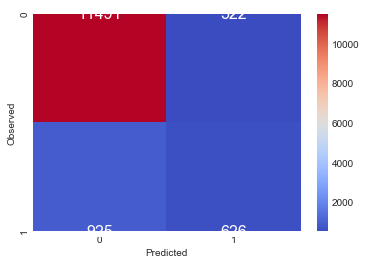

None

Recall: 0.40361057382333976

Precision: 0.5452961672473867

F1 Score: 0.46387550944794365

Roc Auc Score: 0.6800788239132515


In [56]:
print("Trainig accuracy",bgcl.score(X_train,y_train))  
print()
print("Testing accuracy",bgcl.score(X_test, y_test))
BGscore = bgcl.score(X_test, y_test)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
BGrecall = recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
BGpre = precision_score(y_test,y_predict)
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

AdaBoosting

In [57]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)

Trainig accuracy 0.8836540588365406

Testing accuracy 0.8819669713948688

Confusion Matrix


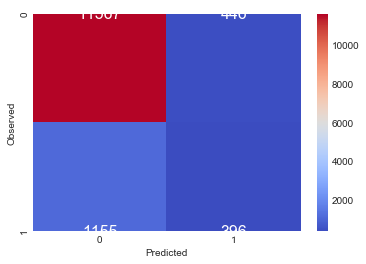

None

Recall: 0.2553191489361702

Precision: 0.47030878859857483

F1 Score: 0.330965315503552

Roc Auc Score: 0.6090963512931912


In [58]:
print("Trainig accuracy",abcl.score(X_train,y_train))  
print()
print("Testing accuracy",abcl.score(X_test, y_test))
BOscore = abcl.score(X_test, y_test)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
BOrecall = recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
BOpre = precision_score(y_test,y_predict)
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Random forest

In [59]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)

Trainig accuracy 0.999715612854299

Testing accuracy 0.8939103509289296

Confusion Matrix


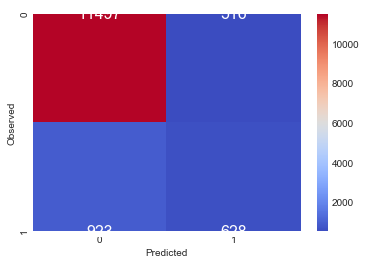

None

Recall: 0.4049000644745326

Precision: 0.548951048951049

F1 Score: 0.4660482374768089

Roc Auc Score: 0.6809732986985998


In [60]:
print("Trainig accuracy",rfcl.score(X_train,y_train))  
print()
print("Testing accuracy",rfcl.score(X_test, y_test))
RFscore = rfcl.score(X_test, y_test)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
RFrecall = recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
RFpre = precision_score(y_test,y_predict)
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [61]:
# compare models 
# initialize list of lists 
data = [['Logistic Regression', LRscore,LRrecall,LRpre], ['decision tree', DTscore,DTrecall,DTpre], 
        ['bagging', BGscore,BGrecall,BGpre],['Boosting',BOscore,BOrecall,BOpre],['Random forest',RFscore,RFrecall,RFpre]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Models', 'Accuracy','Recall','Precission']) 
  
# print dataframe. 
df 

,Models,Accuracy,Recall,Precission
0,Logistic Regression,0.883589,0.192779,0.477636
1,decision tree,0.863610,0.448098,0.411486
2,bagging,0.893321,0.403611,0.545296
3,Boosting,0.881967,0.255319,0.470309
4,Random forest,0.893910,0.404900,0.548951


 All four models provided good accuracy with random forest having the best score , all models did not do well in terms of recall and precision , though random forest has the best precision score while decision tree has the best recall score . parameter tunning and pruning for decision tree can be used to improve model performance. for the the problem domain ie efficient  targeting of  customers that are more likely to subcribe to a term loan, higher recall is more beneficial than higer precision since the cost of lost income to the bank due to a customer not subscribing is normally higher than the cost of marketing to a customer who refuses to subscribe to a term loan after being marketed to.